In [2]:
# %matplotlib notebook
import math
import numpy as np
import scipy.special
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import itertools

In [3]:
# Constants for the different scripts
b   = 2
m   = 6
N   = b**m
N_2 = b**(m//2)
print('Size = ' + str(N) + ' = ' + str(N_2) + ' * ' + str(N_2))

Size = 64 = 8 * 8


## Auxillary Code

In [4]:
# Convert an integer to a bit vector representation. This is very much
# not efficient, but it allows to access the bit vector representation
# using brackets.
# 
# Those function take as input an integer (for index2vector) or a bit
# vector (for vector2real) and output either the vector of bits or a
# floatting point representation in [0,1] of the binary representation
# using x = \sum n_i 2^{-(i+1)}
#
def index2vector(n, b=2, m=8):
    bk = 1
    nk = np.empty([m], int)
    for k in range(0, m):
        nk[k] = (n/bk) % b
        bk *= b
    return nk

def vector2index(nk):
    n = 0
    for b in nk:
        n = (n<<1) +  b    
    return n

def vector2real(n, b, m):
    ob = 1.0/b
    bk = ob
    xn = 0.0
    for k in range(0, m):
        xn += n[k]*bk
        bk *= ob
    return xn

In [5]:
# Create a vector of linearly blended colors that can be used in
# matplolib as a colormap for `pyplot.scatter` for example.
#
# This function takes as input the number of colors points and
# optionnaly, the first and last colors.
#
def color_vector(N, c0=[1,0,0], c1=[0,0,1]):
    colors = np.zeros((N, 3))
    for i in range(0, N):
        u0 = float(i)/float(N-1)
        u1 = 1.0 - u0
        colors[i, 0] = u0*c0[0] + u1*c1[0]
        colors[i, 1] = u0*c0[1] + u1*c1[1]
        colors[i, 2] = u0*c0[2] + u1*c1[2]
    return colors;

In [6]:
def plot_sequence(xy, b=2, m=6, colors='black', plot_lines=False, shift_points=True):
    # Plot the curve and the points
    shift_x = 0.5/N_2 if (shift_points) else 0.0
    shift_y = shift_x
    plt.scatter(xy[:,0] + shift_x, xy[:,1] + shift_y, zorder=2, color=colors);
    if plot_lines:
        plt.plot(xy[:,0] + shift_x, xy[:,1] + shift_y, zorder=1, c='gray');
    plt.axis('square');
    plt.grid(True);
    plt.xticks(np.linspace(0, 1, N_2+1));
    plt.yticks(np.linspace(0, 1, N_2+1));

## Sobol Sequence

The following cell compute the `N` first elements of the Sobol sequence. It also highlight in colors the different groups of elements.

In [7]:
def sobol_1d(N, b, m, C):
    xy = np.empty([N], float)
    for n in range(0, N):
        nk = index2vector(n, b, m)

        nk1 = np.mod((nk*C).A[0], b)

        y1 = vector2real(nk1, b, m)
        xy[n] = y1
    return xy
    

C1 = np.matrix(np.zeros([m,m], int))
C2 = np.matrix(np.zeros([m,m], int))
for k in range(0, m):
    C1[k,k] = 1
    for l in range(k, m):
        C2[k,l] = scipy.special.binom(l, k) % b

C1 = C1.transpose()
C2 = C2.transpose()
# print(C2)

iC1 = np.linalg.inv(C1)
iC2 = np.linalg.inv(C2)

T12 = iC1*C2
T21 = iC2*C1

print("C1 = " + str(C1))
print("C2 = " + str(C2))

C1 = [[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]]
C2 = [[1 0 0 0 0 0]
 [1 1 0 0 0 0]
 [1 0 1 0 0 0]
 [1 1 1 1 0 0]
 [1 0 0 0 1 0]
 [1 1 0 0 1 1]]


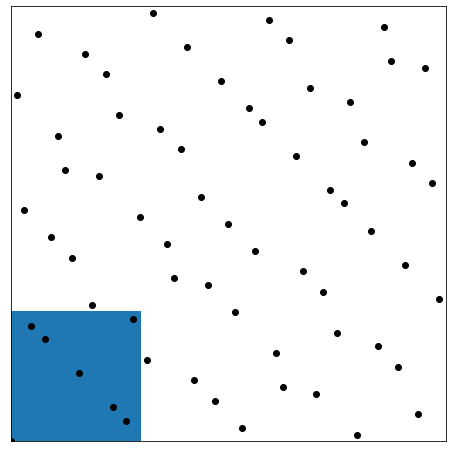

In [14]:
fig, ax = plt.subplots(figsize=(8,8))

B12 = T12[0:2, 0:2]
P12 = np.linalg.inv(T12[2:4, 0:2])

xy = np.empty([N,2], float)
for n in range(0, N):
    nk = index2vector(n, b, m)

    nk1 = np.mod((nk*C1).A[0], b)
    nk2 = np.mod((nk*C2).A[0], b)
    test_vec = (nk2[0:2] - nk1[0:2]*B12) * P12
    test_nk2 = np.mod(test_vec.A[0], b)

    y1 = vector2real(nk1, b, m)
    y2 = vector2real(nk2, b, m)
    xy[n, 0] = y1
    xy[n, 1] = y2

    nx = np.mod((nk1*iC1).A[0], b)
    ny = np.mod((nk2*iC2).A[0], b)
    

N1 = b**2
plt.plot(xy[0:N1,0], xy[0:N1,1], 'ko')
N2 = b**4
plt.plot(xy[N1:N2,0], xy[N1:N2,1], 'ko')
N3 = b**6
plt.plot(xy[N2:N3,0], xy[N2:N3,1], 'ko')
plt.plot(xy[N3:N,0], xy[N3:N,1], 'ko')

m_min = 1
N4 = b**(min(m, m_min))
ax.set_xticks(np.linspace(0, 1, N4+1))
ax.set_yticks(np.linspace(0, 1, N4+1))
# plt.grid()
plt.axis('square')
plt.axis([0.0,1.0,0.0,1.0])
plt.xticks([])
plt.yticks([])

plt.fill_between([0, 0.3], [0.0, 0.0], [0.3, 0.3])

# For n = 16 points
# ax.add_patch(plt.Rectangle((0.0, 0.0), 0.5, 0.5, facecolor="#d3dce5"))
# ax.add_patch(plt.Rectangle((0.5, 0.0), 0.5, 0.5, facecolor="#ffebea"))
# ax.add_patch(plt.Rectangle((0.0, 0.5), 0.5, 0.5, facecolor="#ffebea"))
# ax.add_patch(plt.Rectangle((0.5, 0.5), 0.5, 0.5, facecolor="#d3dce5"))

# plt.title('The first ' + str(b**m) + ' points of the Sobol sequence');

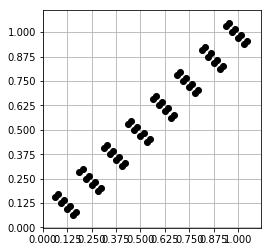

In [21]:
fig, ax = plt.subplots()

B12 = T12[0:2, 0:2]
P12 = np.linalg.inv(T12[2:4, 0:2])

scramble_1 = np.random.randint(2, size=m)
scramble_2 = np.random.randint(2, size=m)

xy = np.empty([N,2], float)
for n in range(0, N):
    nk = index2vector(n, b, m)

    nk1 = np.mod((nk*C1).A[0], b)
    nk2 = np.mod((nk*C2).A[0], b)
    test_vec = (nk2[0:2] - nk1[0:2]*B12) * P12
    test_nk2 = np.mod(test_vec.A[0], b)

    nk1 = np.logical_xor(nk1, scramble_1)
#     nk2 = np.logical_xor(nk2, scramble_1)
    nk1 = np.logical_xor(nk2, scramble_2)
    
    y1 = vector2real(nk1, b, m)
    y2 = vector2real(nk2, b, m)
    xy[n, 0] = y1
    xy[n, 1] = y2
    
plot_sequence(xy)

## Z Space Filling Curve

The next cell showcase the z-curve (also called Morton code) for the first `N` integers.

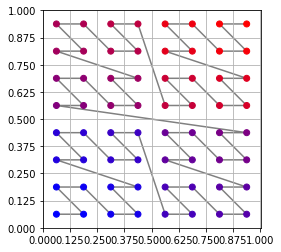

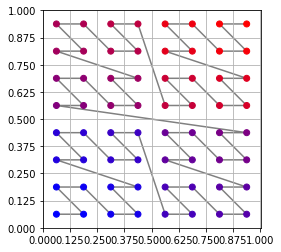

In [9]:
def morton_curve(N):
    xy = np.zeros([len(N), 2])
    for n in N:
        nk = index2vector(n, b, m)
        s  = 1.0
        for i in reversed(range(0, m//2)):
            s *= 0.5
            uv = [ nk[2*i+0], nk[2*i+1] ]
            xy[n][0] += s * float(nk[2*i+0])
            xy[n][1] += s * float(nk[2*i+1])
    return xy

def morton_curve_from_binary(NK):
    xy = np.zeros([NK.shape[0], 2])
    for n in range(0, NK.shape[0]):
        nk = NK[n]
        s  = 1.0
        for i in reversed(range(0, m//2)): # Level traversal
            s *= 0.5
            uv = [ nk[2*i+0], nk[2*i+1] ]
            xy[n][0] += s * float(nk[2*i+0])
            xy[n][1] += s * float(nk[2*i+1])
    return xy


## Testing that both functions provide the same output

nn  = range(0, N)
COLORS = color_vector(N)

# Plot the z-filling curve using the `morton_curve_from_binary` interface
NK  = np.zeros((N, m))
for n in nn:
    iK =  index2vector(n, b, m)
    NK[n,:] = iK
xy  = morton_curve_from_binary(NK)

fig, ax = plt.subplots();
plot_sequence(xy, b, m, COLORS, plot_lines=True)


# Plot the z-filling curve using the `morton_curve` interface
xy = morton_curve(nn)

fig, ax = plt.subplots();
plot_sequence(xy, b, m, COLORS, plot_lines=True)

## Owen's Scrambling

In [10]:
"""
Scramble the binary vector `nk` by applying local permutation
and mirroring to couples of bits in the vector. In this case,
we use only two bits but it is more general. 
"""
def owen_scrambling_2(nk, perm_tree, perm_four):
    half_size = len(nk)//2
    
    # offset and index enable to look into the permutation table
    offset = 0
    c_size = 0
    index  = 0
    
    nkp = np.empty([len(nk)], int)
    
    for n in range(0, half_size):
        # update the offset 
        offset = offset*4 + index
        
        # fetch the permutation and apply it to the nk index
        pi = perm_tree[offset + c_size]
#         print(pi)
        pk = perm_four[ pi ]
        vk = nk[2*n:2*n+2]
        
        index = vector2index(vk)
        index = pk[index]
        nkp[2*n]   = index & 1
        nkp[2*n+1] = (index>>1) & 1
        
#         print("permutation[" + str(offset + c_size) + "] = " + str(pk) + " : " + str(vk) + " => " + str(nkp[2*n:2*n+2]))
        
        # Update the number of used tree cells
        c_size = c_size + 4**n
    return nkp



perm_temp = itertools.permutations(range(0,4))
perm_four = []
for p in perm_temp:
    perm_four += [p]
perm_tree = np.random.randint(24, size=[4 << m])


elem = np.random.randint(1, size=[m])
elem[1] = 1
elem[0] = 1
print(elem)
print(owen_scrambling_2(elem, perm_tree, perm_four))

[1 1 0 0 0 0]
[1 1 0 0 0 1]


## Sobol with Z Curve Embedding

The following cell show the first elements of the Sobol sequence embedded in a z-curve. We first compute the binary representation of the i-th Sobol element and then use this as the Morton code (z-curve binary repesentation) to search for the position in space.

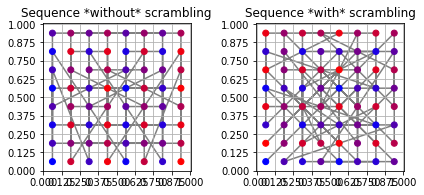

In [11]:
# Create a sequence of `N` 2D points by first computing the binary form of 
# the Sobol sequence using the matrices C1 and C2. Then, use the binary form
# as the Morton code in 2D.
#
def sobol_morton_2d(N, b, m, C, scrambling=True):
    NK = np.zeros((N, m))
    for n in range(0, N):
        # Extract the binary rep of 'n'
        nk  = index2vector(n, b, m)
        
        # Generate the Sobol element corresponding to the
        # binary representation of 'n'
        nk2 = np.mod((nk*C).A[0], b)
        
        # Optionally, flip the sequence. I found that it
        # helps a lot to distribute the elements
        nk2 = np.flip(nk2)
        
        # Apply Owen's scrambling algorithm on this binary form.
        # At each level (group of two bits), apply a permutation of the 4-cells
        # it represents.
        if scrambling:
            nk2 = owen_scrambling_2(nk2, perm_tree, perm_four)
        NK[n, :] = nk2
        
    # Apply Morton curve to get the XY coordinates
    xy = morton_curve_from_binary(NK)
    return xy

# Create a color range
COLORS = color_vector(N)


# Plot the sequence without scrambling
xy = sobol_morton_2d(N, b, m, C=C2, scrambling=False)
plt.subplot(1, 2, 1)
plot_sequence(xy, b, m, COLORS, plot_lines=True)
plt.title('Sequence *without* scrambling')


# PLot the sequence with scrambling
xy = sobol_morton_2d(N, b, m, C=C2)
plt.subplot(1, 2, 2)
plot_sequence(xy, b, m, COLORS, plot_lines=True)
plt.title('Sequence *with* scrambling')
plt.tight_layout();

### Comments

We can see that the z-curve is shuffling a bit the elements in the sequence. However, the shuffling is a bit disapointing. The other property we loose is the ability to have a correct projection of the sequence without overlaps on each subdimension of the target space.

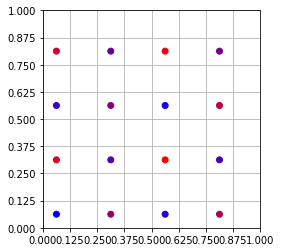

In [12]:
N1 = 64

# Draw two rows 'ri' and 'rj' and swap them. Do that multiple times to get
# a random permutation from the identity matrix.
S=np.matrix(np.identity(m))
for i in range(0, 100):
    ri = np.random.randint(m)
    rj = np.random.randint(m)
    Temp    = S[ri,:].copy()
    S[ri,:] = S[rj,:]
    S[rj,:] = Temp

xy = sobol_morton_2d(N, b, m, C=C2);

# Plot the curve and the points
# for i in range(2, N+1):
#     fig, ax = plt.subplots();
#     COLORS = color_vector(i)
#     plot_sequence(xy[0:i, :], b, m, COLORS)
fig, ax = plt.subplots();
COLORS = color_vector(16)
plot_sequence(xy[0:16, :], b, m, COLORS[0:16, :])

## Dither Mask

Here, we disply a 1D dither mask associated with the sequence. The mask is build using the z-curve and using the index of the element in the sequence as the dither value to put in the mask.

In [13]:
def compute_energy(ij, x,sigma_ij=0.1, sigma_x=0.1):
    energy = 0.0
    for k in range(0,N):
        p_ij = ij[k]
        p_x  = x[k]
        
        d_ij = np.linalg.norm(p_ij - ij, axis=0)
        d_x  = np.linalg.norm(p_x  - x, axis=0)
        d_e  = np.exp(- (sigma_ij * d_ij*d_ij + sigma_x * d_x*d_x))
#         d_e  = 1.0 / (0.001 + (sigma_ij * d_ij*d_ij + sigma_x * d_x*d_x))
        energy += np.average(d_e)
            
    return energy


def display_mask(ij, x, title=None):
    # Show the masks and the classical one
    mask = np.zeros([N_2, N_2])
    for n in range(0, N):
        i = int(N_2 * ij[n, 0])
        j = int(N_2 * ij[n, 1])
        mask[i,j] = x[n]

    fig = plt.figure()
    if title != None:
        plt.title('title')
    
    plt.subplot(1, 2, 1)
    img_mask = plt.imshow(mask, cmap="Greys")
    plt.title('Dither Mask')

    plt.subplot(1, 2, 2)
    f_mask = np.fft.fftshift(np.fft.fft2(2.0*(mask - 0.5)))
    a_mask = np.abs(f_mask)**2
    img_fft = plt.imshow(a_mask)
    plt.title('Power Spectrum');
    plt.show()

In [ ]:
# Start with a pure random tree
perm_tree = np.random.randint(24, size=[4 << m])

# Generate Sobol with Z-curve embedding
ij = sobol_morton_2d(N, b, m, C=C2)
x  = sobol_1d(N, b, m, C=C1)

energy = compute_energy(ij, x)
print("Starting energy = " + str(energy))

display_mask(ij, x)
    
# Optimization routine
k_max = 100000
for k in range(0, k_max):
    # Mutate an element in the permuation tree
    [index_1, index_2] = np.random.randint(perm_tree.shape[0], size=2)
#     [value_1] = np.random.randint(24, size=1)
#     value_0 = perm_tree[index_1]
#     perm_tree[index_1] = value_1
    perm_tree[[index_1, index_2]] = perm_tree[[index_2, index_1]]
    
    # Generate the points and evaluate the metric
    ij   = sobol_morton_2d(N, b, m, C=C2);
    x    = sobol_1d(N, b, m, C=C1)
    e_ij = compute_energy(ij, x)
    
    
    # Update the temperature, we must reject mutation that have a
    # positive differential energy with higher frequencyies as we
    # reach the max number of iterations.
    dE = energy - e_ij
    T0  = 10.0 * (k_max - k) / k_max
    T   = np.exp(- dE / T0)
    
    # Keep the metric if the energy is reduced
    if np.random.uniform() > T:
#         perm_tree[index_1] = value_0
        perm_tree[[index_1, index_2]] = perm_tree[[index_2, index_1]]
    else:
        energy = e_ij
    print(" Current energy = " + str(energy) + ", T0 = " + str(T0), end="\r", flush=True)
        
display_mask(ij, x)

In [ ]:
# Generate Sobol with Z-curve embedding
ij = sobol_morton_2d(N, b, m, C=C2);
x  = sobol_morton_2d(N, b, m, C=C1)

# Show the masks and the classical one
mask = np.zeros([N_2, N_2, 3])
for n in range(0, N):
    i = int(N_2 * ij[n, 0])
    j = int(N_2 * ij[n, 1])
    mask[i,j, 0] = x[n, 0]
    mask[i,j, 1] = x[n, 1]

fig = plt.figure()
plt.subplot(1, 3, 1)
img_mask = plt.imshow(mask)
plt.title('2D Dither Mask')

plt.subplot(1, 3, 2)
img_mask = plt.imshow(mask[...,0], cmap="Greys")
plt.title('x-component');

plt.subplot(1, 3, 3)
img_mask = plt.imshow(mask[...,1], cmap="Greys")
plt.title('y-component');
plt.tight_layout();